In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

## 1) Number of males and females participated in the test

In [14]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### Number Of Females: 518
#### Number Of Males: 482

## 2) What do you think about the students' parental level of education?

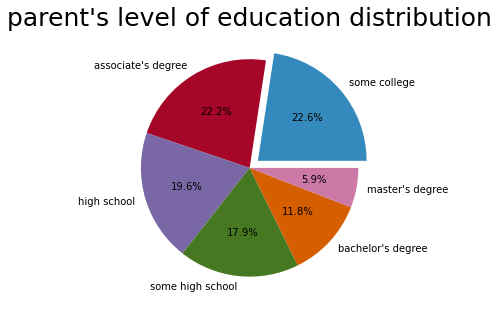

In [21]:
parent=df['parental level of education'].value_counts()
plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.pie(parent, labels=parent.index, autopct='%1.1f%%', explode=[0.1,0,0,0,0,0])
plt.title("parent's level of education distribution", fontsize=25)
plt.show()

#### Observation: Most of the Parents have some level of college education

## 3) Who scores the most on average for math, reading and writing based on

In [26]:
df['Total score']=df['math score'] + df['reading score'] + df['writing score']
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,female,group B,high school,free/reduced,none,8,24,23,55
2,female,group B,some high school,free/reduced,none,18,32,28,78


In [27]:
gender=df.groupby('gender')['Total score'].mean()
data=pd.DataFrame()
data['gender']=gender.index
data['Avg_total_score']=gender.values
data

,gender,Avg_total_score
0,female,208.434363
1,male,197.813278


### Gender

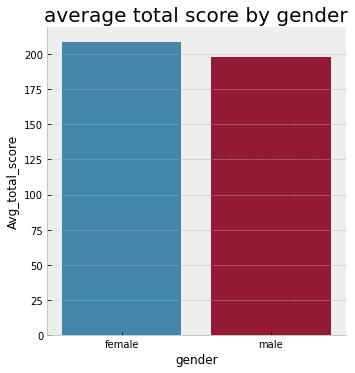

In [28]:
sns.catplot(x='gender', y='Avg_total_score', data=data, kind='bar')
plt.title('average total score by gender', fontsize=20)
plt.show()

#### Observation : On average females scored more than males

### Test preparation course

In [30]:
tpc=df.groupby('test preparation course')['Total score'].mean()
data=pd.DataFrame()
data['test preparation course']=tpc.index
data['Avg_total_score']=tpc.values
data

,test preparation course,Avg_total_score
0,completed,218.826816
1,none,194.665109


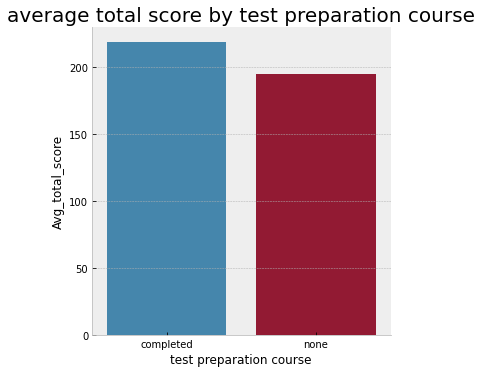

In [32]:
sns.catplot(x='test preparation course', y='Avg_total_score', data=data, kind='bar')
plt.title('average total score by test preparation course', fontsize=20)
plt.show()

#### Observation : On average students who completed preparation course scored more than students who didn't

## What do you think about the scoring variation for math, reading and writing based on

### Gender

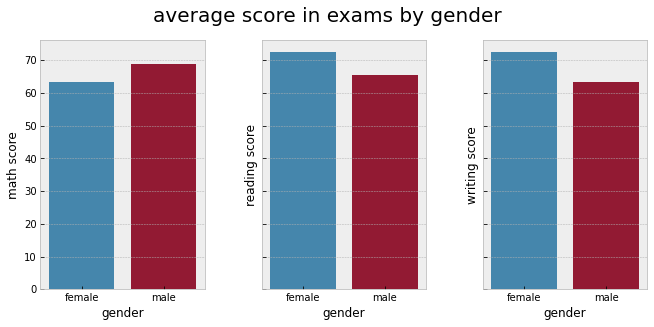

In [24]:
df.pivot_table(values=['math score', 'reading score', 'writing score'], index='gender').reset_index()
fig, axes=plt.subplots(1, 3,sharey=True, figsize=(10,5))
sns.barplot(ax=axes[0], x='gender', y='math score', data=df,  ci=None)
sns.barplot(ax=axes[1], x='gender', y='reading score', data=df, ci=None)
sns.barplot(ax=axes[2], x='gender', y='writing score', data=df, ci=None)
plt.tight_layout(pad=4.0)
fig.suptitle('average score in exams by gender', fontsize=20)
plt.show()

#### Observation: The male students performed better in the math exams while the female students performed better in the reading and writing exams.

### Completion of test preparation course

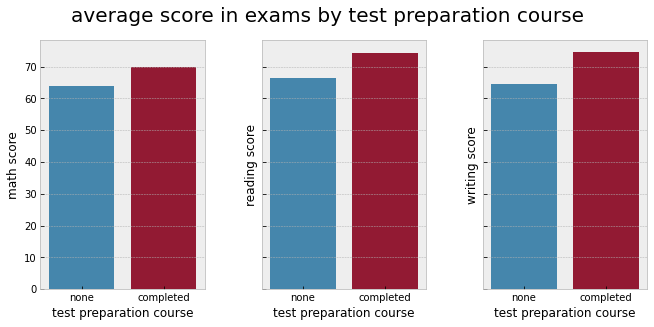

In [25]:
df.pivot_table(values=['math score', 'reading score', 'writing score'], index='test preparation course').reset_index()
fig, axes=plt.subplots(1, 3,sharey=True, figsize=(10,5))
sns.barplot(ax=axes[0], x='test preparation course', y='math score', data=df,  ci=None)
sns.barplot(ax=axes[1], x='test preparation course', y='reading score', data=df, ci=None)
sns.barplot(ax=axes[2], x='test preparation course', y='writing score', data=df, ci=None)
plt.tight_layout(pad=4.0)
fig.suptitle('average score in exams by test preparation course', fontsize=20)
plt.show()

#### Observation: The students who have completed the test preparation course have higher score in all exams. 

## Top 25% of students based on their math score

In [41]:
df.nlargest(n=25, columns=['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
515,female,group E,some college,standard,none,100,92,97,289
516,female,group E,bachelor's degree,standard,none,100,100,100,300
517,female,group E,associate's degree,standard,none,100,100,100,300
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293
999,male,group E,bachelor's degree,standard,completed,100,100,100,300
513,female,group E,bachelor's degree,standard,completed,99,100,100,299
514,female,group E,high school,standard,none,99,93,90,282
995,male,group E,some college,standard,completed,99,87,81,267
